In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
# Пути к директориям с данными
train_dir = 'Train'
test_dir = 'Test'

# Параметры
img_height, img_width = 100, 100
batch_size = 32
epochs = 75

# Аугментация данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Генераторы данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10605 images belonging to 22 classes.
Found 3557 images belonging to 22 classes.


In [29]:
# Построение модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Колбэки
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
#model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

In [30]:
# Обучение модели
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]#, model_checkpoint]
)

Epoch 1/75


C:\Users\Dmi3m\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


331/331 ━━━━━━━━━━━━━━━━━━━━ 112s 326ms/step - accuracy: 0.5526 - loss: 1.3943 - val_accuracy: 0.8891 - val_loss: 0.2839
Epoch 2/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.8750 - loss: 0.4998 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 3/75


C:\Users\Dmi3m\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


331/331 ━━━━━━━━━━━━━━━━━━━━ 62s 186ms/step - accuracy: 0.9234 - loss: 0.2195 - val_accuracy: 0.9679 - val_loss: 0.1888
Epoch 4/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 1.0000 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 65s 196ms/step - accuracy: 0.9671 - loss: 0.0984 - val_accuracy: 0.8972 - val_loss: 0.4260
Epoch 6/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.9375 - loss: 0.3572 - val_accuracy: 0.8000 - val_loss: 2.2302
Epoch 7/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 66s 199ms/step - accuracy: 0.9586 - loss: 0.1324 - val_accuracy: 0.9696 - val_loss: 0.1292
Epoch 8/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 1.0000 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 4.2915e-07
Epoch 9/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 68s 204ms/step - accuracy: 0.9802 - loss: 0.0683 - val_accuracy: 0.9659 - val_loss: 0.1954
Epoch 10/75
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 1.0000 - loss: 0.0268 - val_a

In [31]:
model.save_weights('best_model.weights.h5')

In [32]:
# Загрузка наилучшей модели
model.load_weights('best_model.weights.h5')

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy*100:.2f}%')

112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9727 - loss: 0.1848
Test accuracy: 97.10%


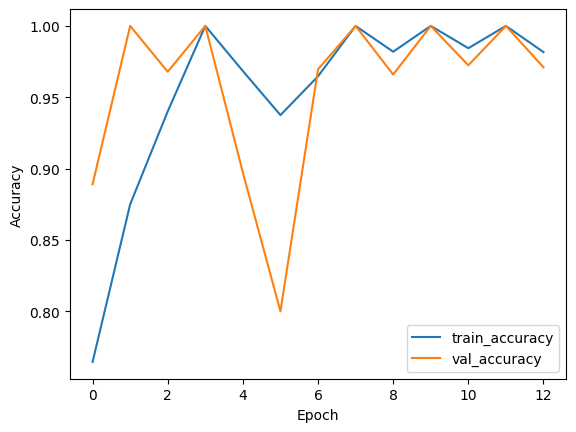

In [33]:
# Визуализация истории обучения
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
img = tf.keras.utils.load_img('Test/Mango/0_100.jpg') 
img_arr = tf.keras.utils.img_to_array(img)
img_arr = tf.expand_dims(img_arr, 0)

In [35]:
prediction = model.predict(img_arr)
prediction_class = np.argmax(model.predict(img_arr), axis=1)
print(prediction_class[0])
print(train_generator.class_indices)
print(_, index := np.unique(prediction_class[0], return_index=True))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
18
{'Apple Granny Smith': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Blueberry': 4, 'Cantaloupe 1': 5, 'Cherry 1': 6, 'Cocos': 7, 'Corn': 8, 'Eggplant': 9, 'Guava': 10, 'Huckleberry': 11, 'Lemon': 12, 'Lychee': 13, 'Mango': 14, 'Mulberry': 15, 'Onion Red': 16, 'Papaya': 17, 'Pear': 18, 'Pepino': 19, 'Raspberry': 20, 'Strawberry': 21}
 (array([18], dtype=int64), array([0], dtype=int64))


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │        11,286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,975,940 (76.20 MB)

 Trainable params: 6,658,646 (25.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,317,294 (50.80 MB)